## Problem Statement 
##### To build an application to classify the patients to be healthy or suffering from cardiovascular disease 


In [296]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import plot_importance
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pickle
import os

### Reading the files

In [184]:
os.chdir("F:/Datasets/CardioVascularDisease/CardioVascularDisease")
data=pd.DataFrame(pd.read_csv("cardio_train.csv",sep=";"))

### Exploratory Data Anlaysis

In [185]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


###### The features in the dataset are
1. id: Patient ID
2. age: Age in days
3. gender : Gender
4. height : Height
5. weight : Weight
6. ap_hi  : Systolic blood pressure 
7. ap_lo  : Diastolic blood pressure 
8. cholestrol : Cholesterol level
9. gluc    : Glucose level
10. alco   : Alcohol intake
11. active : Activity level
12. cardio : Presence or abscence of cardiovascular disease-Target variable

In [187]:
data['age']=round(data['age']/365) ### Converting days to years

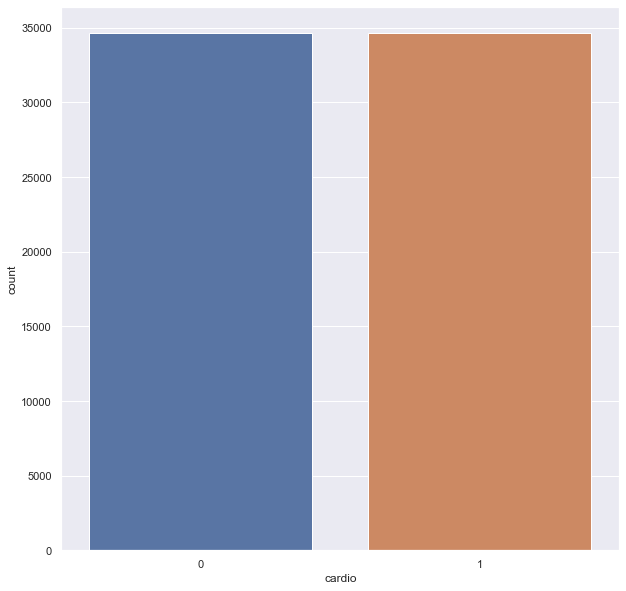

In [188]:
sns.set(style="darkgrid")
sns.countplot(x="cardio", data=data)

#### Note: There is no class imbalance

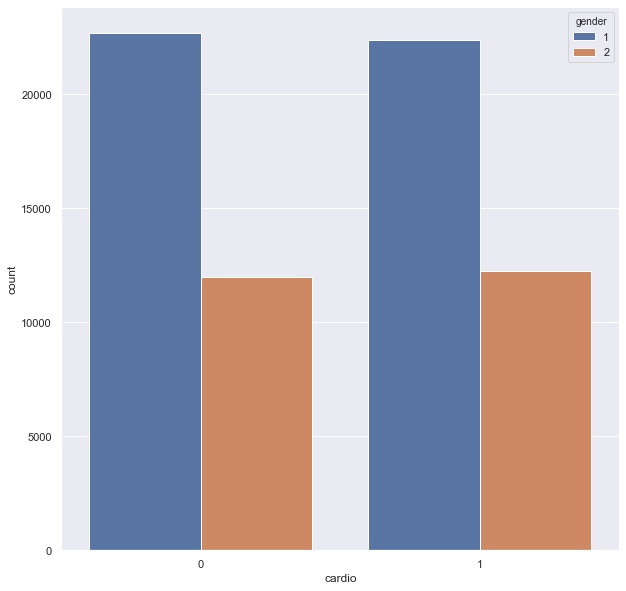

In [189]:
sns.countplot(x="cardio", hue="gender", data=data)

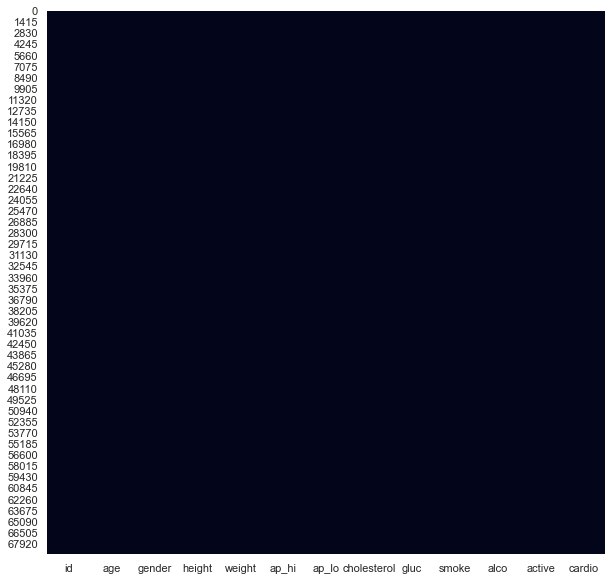

In [190]:
sns.heatmap(data.isnull(), cbar=False)

##### There are no NA values

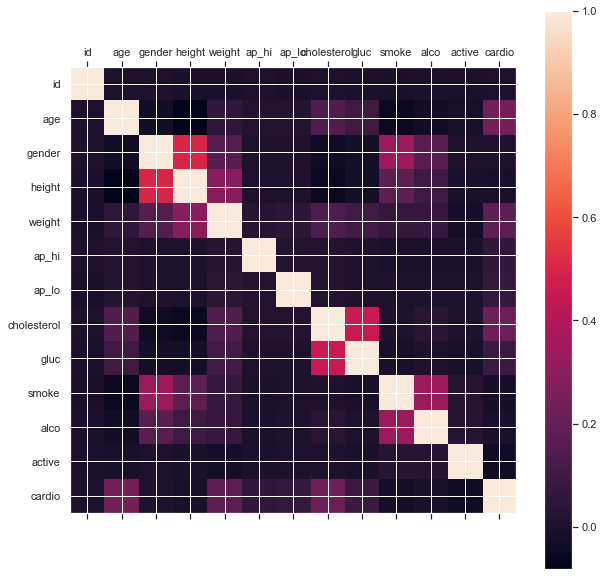

In [191]:
########Correlation Plot##############
plt.rcParams['figure.figsize'] = 10,10
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6F26C1308>,
      dtype=object)

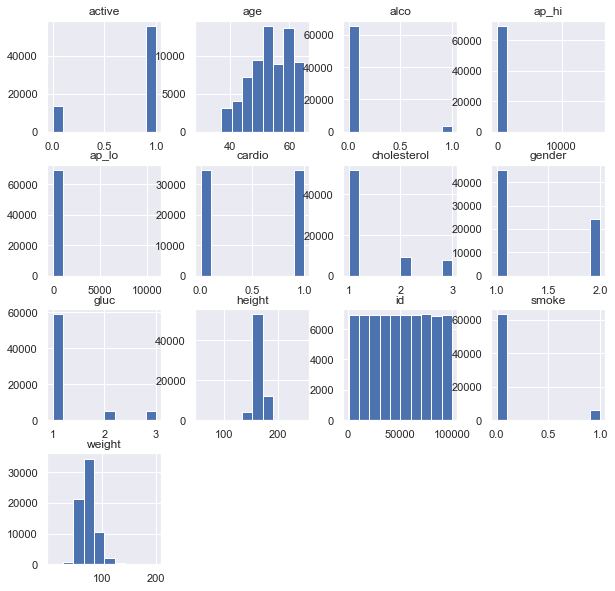

In [192]:
data.hist()

### Feature importance and selection

In [193]:
dataset=data.copy()
data = pd.get_dummies(data, columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])
standardScaler = StandardScaler()
min_max=MinMaxScaler()
columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','id','height']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
#data[columns_to_scale] = min_max.fit_transform(data[columns_to_scale])
data=data.drop(['id'], axis=1)

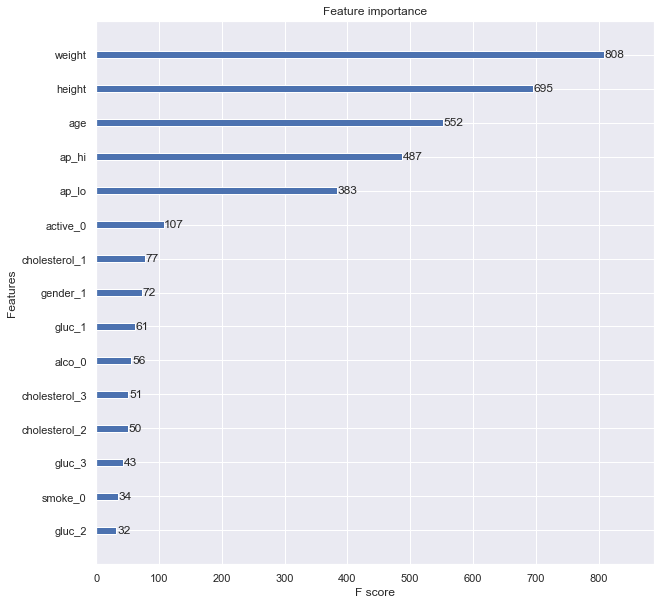

In [203]:
############# Feature Importance performed by XGboost classifier
X=data[['age', 'height', 'weight', 'ap_hi', 'ap_lo','gender_1',
       'gender_2', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1',
       'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1',
       'active_0', 'active_1']]
y=data['cardio']

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()

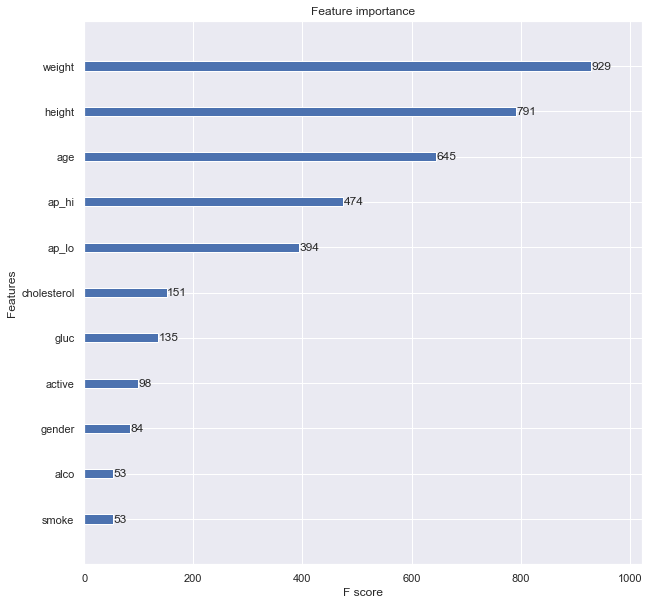

In [212]:
X=dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo','gender','cholesterol', 'gluc',
       'smoke', 'alco',
       'active', ]]
y=dataset['cardio']

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()

### Model Creation

##### Logistic Regression

In [208]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'height', 'weight', 'ap_hi', 'ap_lo','active_0','cholesterol_1'
                                                         ,'gender_1','gluc_1','alco_0']],
                                                    data['cardio'], test_size=0.2, random_state=0)

In [209]:
logistic_regression= LogisticRegression(C=0.2)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Accuracy:  0.7146670514392901


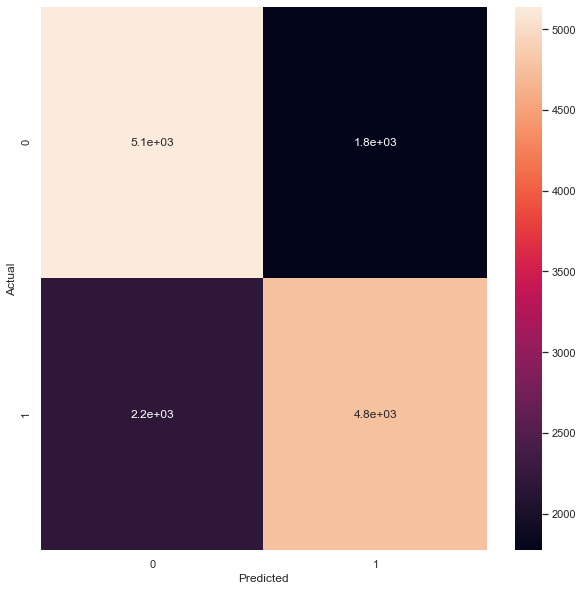

In [210]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

##### Decision Tree

In [217]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo',
                                                             'cholesterol','gluc','active']], 
                                                    data['cardio'], test_size=0.2, random_state=0)

In [218]:
dtree=DecisionTreeClassifier()

In [219]:
params={
 "criterion" :      ["gini","entropy"],
 "splitter"         : ["best"] ,
 "max_depth"        : [1,2,3,4,5,6,7,8],
 "min_samples_leaf" : [5,6,7,8,9,10],
 "max_features" : ["log2","sqrt"],
 "max_leaf_nodes":[10,20,30,40,50,70,100,200,300,500]
}

In [220]:
random_search=GridSearchCV(dtree,param_grid=params,scoring=make_scorer(f1_score),n_jobs=-1,cv=5
                           ,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3904 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7552 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9024 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [221]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 500,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [222]:
random_search.best_score_

0.7214963830303425

In [223]:
y_pred=random_search.predict(X_test)

Accuracy:  0.7245508982035929


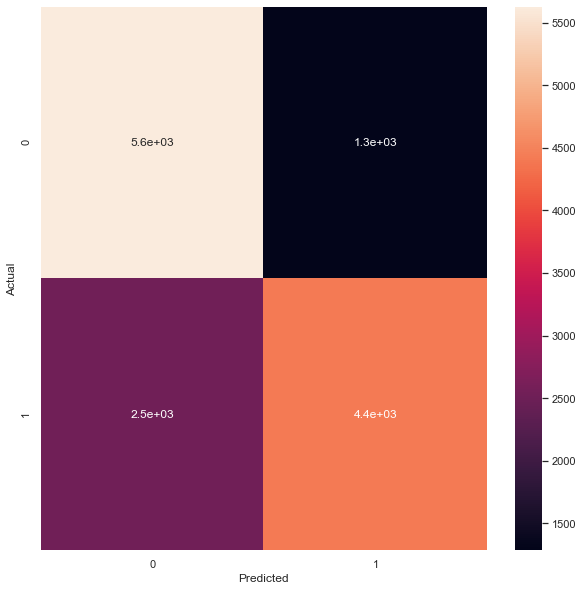

In [224]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

#### Gradient Boosting

In [281]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc']], 
                                                    data['cardio'], test_size=0.2, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
params={
 "loss"             :['deviance'],   
 "min_samples_split":[0.02,0.5],
 "max_depth"        :[2,3,4],
 "learning_rate"    :[0.01,0.2,0.3,0.4],
 #"n_estimators"     :[3000],
 #"subsample"        :[0.99],
 "max_features"     :['log2','sqrt'],
 #"min_samples_leaf" :[0.01,0.02,0.03]
}


In [282]:
GBM=GridSearchCV(clf,param_grid=params,scoring=make_scorer(roc_auc_score),n_jobs=-1,cv=5,
                 verbose=3)
GBM.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [283]:
GBM.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 0.02}

In [284]:
GBM.best_score_

0.7347888968547609

In [285]:
y_pred=GBM.predict(X_test)

Accuracy:  0.7339297308996465


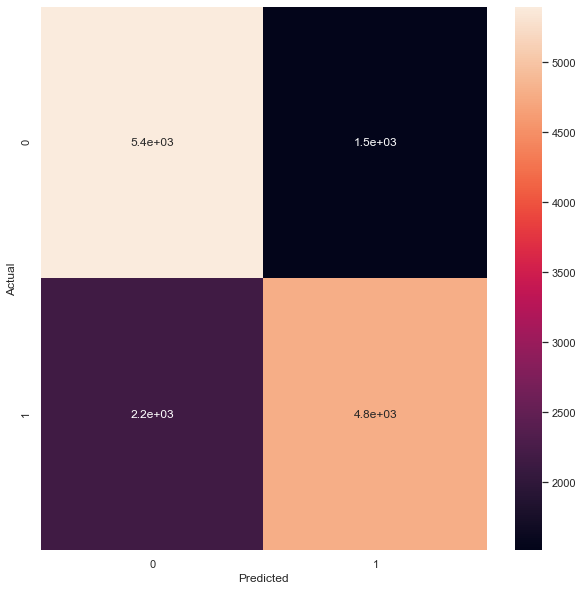

In [286]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

##### Random Forest

In [196]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 
                                                             'cholesterol', 'gluc', 'smoke', 'alco',
       'active']], data['cardio'], test_size=0.2, random_state=0)
clf = RandomForestClassifier()
params={
 "criterion" :      ["gini","entropy"],
 "max_depth"        : [2,3,4],
 "n_estimators"     :[200,300,500],
 "max_features" : ["log2","sqrt"],
 "max_leaf_nodes":[100,200,300,400]    
}


In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer,f1_score
Rf=GridSearchCV(clf,param_grid=params,scoring=make_scorer(f1_score),n_jobs=-1,cv=5,
                 verbose=3)
Rf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 31.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [198]:
Rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 300,
 'n_estimators': 200}

In [199]:
Rf.best_score_

0.7100911117127717

Accuracy:  0.7252723468725201


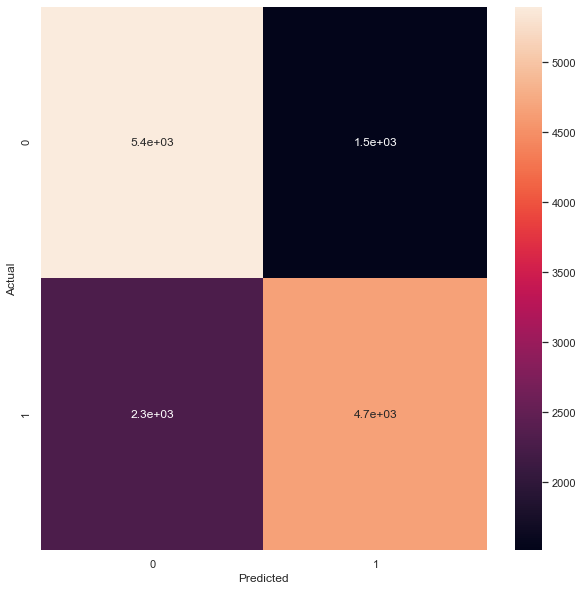

In [200]:
y_pred=Rf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

##### XGBoost Classifier

In [302]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'weight', 'height','ap_hi', 'ap_lo',
                                                             'cholesterol']], data['cardio'], 
                                                    test_size=0.2, random_state=0)

In [305]:
params={"learning_rate"    : [ 0.20, 0.25, 0.30 ] ,
        "objective" : ['binary:logistic'],
 "max_depth"        : [ 2, 3, 4,5,6,7,8],
 "gamma"            : [0.05, 0.2,0.3 ],
 #"boosting"  : ['gbtree']
 #'colsample_bytree': [0.6, 0.8, 1.0]

}

In [306]:
model = XGBClassifier()

In [307]:
Xgb=GridSearchCV(model,param_grid=params,scoring=make_scorer(roc_auc_score),n_jobs=-1,cv=5,
                 verbose=3)
Xgb.fit(X_train,y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [309]:
Xgb.best_params_

{'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 3,
 'objective': 'binary:logistic'}

In [310]:
Xgb.best_score_

0.7342416887544736

Accuracy:  0.7332082822307193


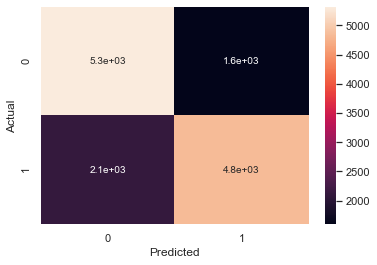

In [311]:
y_pred=Xgb.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

##### Creating model dump
- Choosing XGboost classifier as the final model 

In [312]:
os.chdir("F:/Datasets/CardioVascularDisease/CardioVascularDisease") 
Filename = "CVD.pkl"  

with open(Filename, 'wb') as file:  
    pickle.dump(Xgb, file)